# *EVALUASI AKHIR SEMESTER*

- Nama: Joice Ocrisa
- NRP: 5003221066
- Data Mining dan Visualisasi C

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [93]:
df = pd.read_csv('diabetes_dataset.csv')
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


## Preprocessing

In [94]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [96]:
df.duplicated().sum()

np.int64(14)

In [97]:
# Duplicate rows are removed
df.drop_duplicates(inplace=True)

In [98]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

In [99]:
# Checking for missing values
df.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

## Summary Statistics and Visualization

<Axes: xlabel='diabetes', ylabel='Count'>

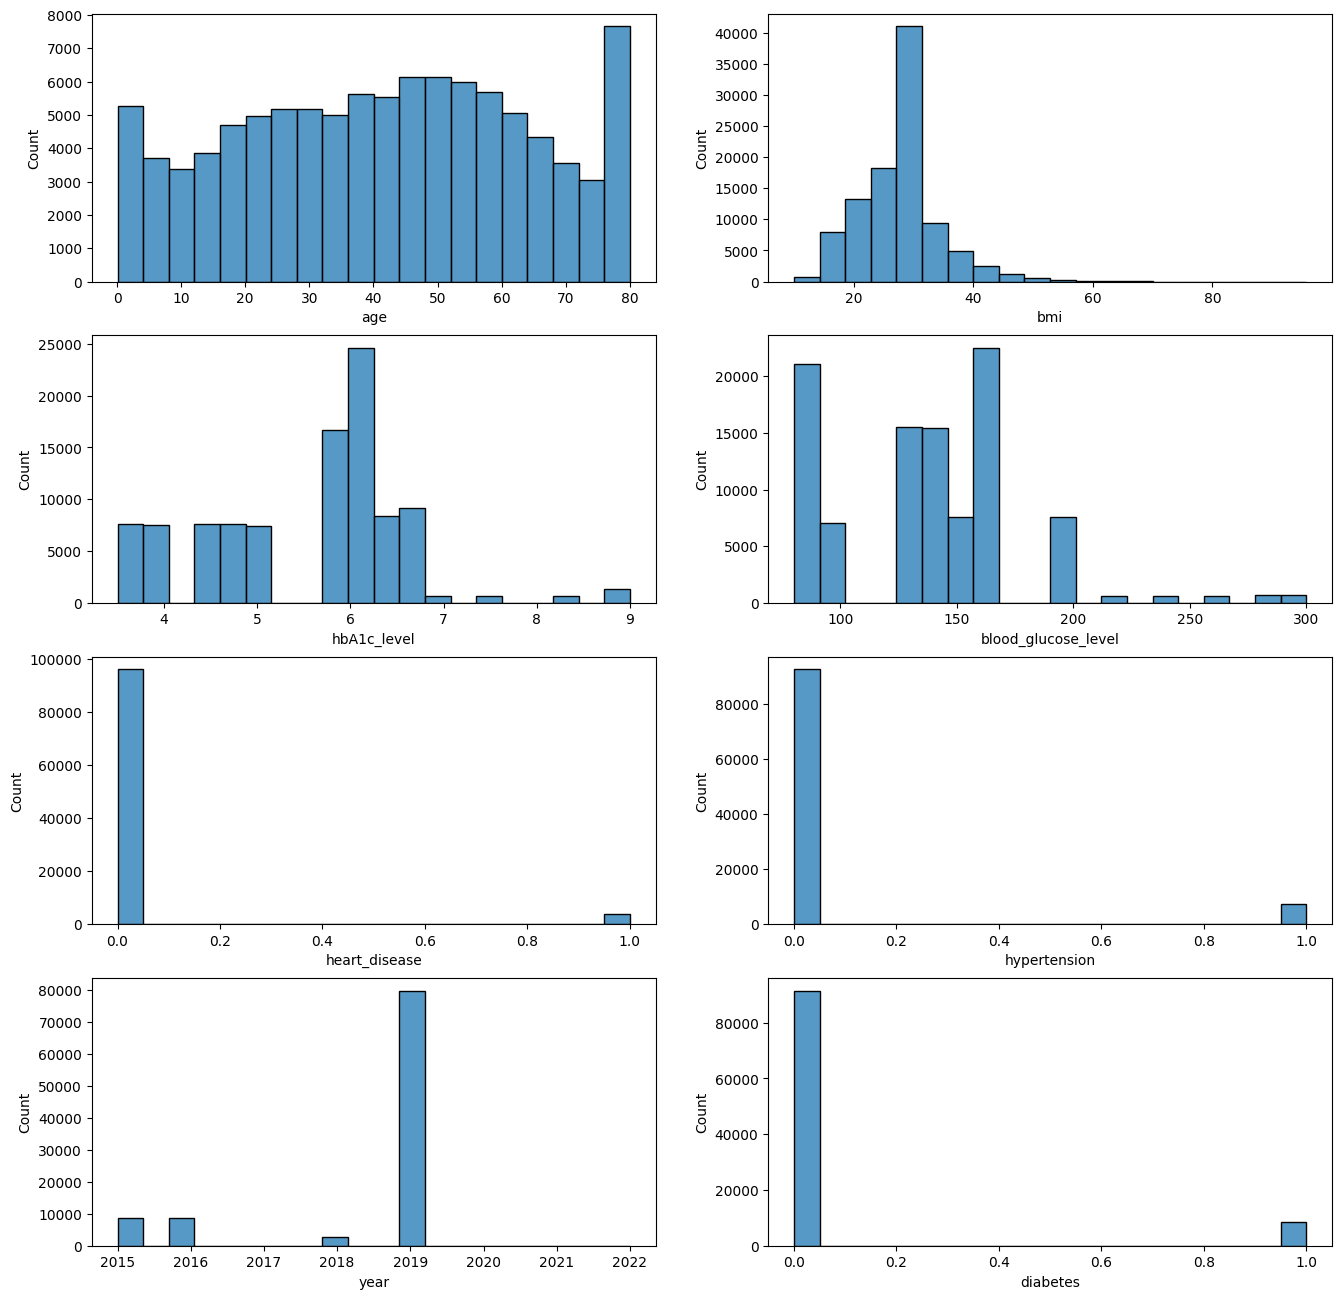

In [100]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df['age'], bins = 20, ax=ax[0,0])
sns.histplot(df['bmi'], bins = 20, ax=ax[0,1])
sns.histplot(df['hbA1c_level'], bins = 20, ax=ax[1,0])
sns.histplot(df['blood_glucose_level'], bins = 20, ax=ax[1,1])
sns.histplot(df['heart_disease'], bins = 20, ax=ax[2,0])
sns.histplot(df['hypertension'], bins = 20, ax=ax[2,1])
sns.histplot(df['year'], bins = 20, ax=ax[3,0])
sns.histplot(df['diabetes'], bins = 20, ax=ax[3,1])

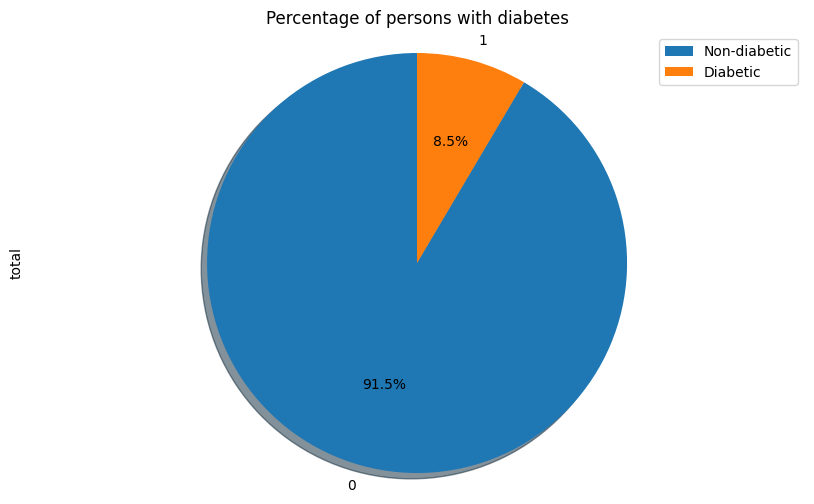

In [101]:
df_diabete = df.groupby('diabetes')['gender'].count().reset_index().rename(columns = {'gender': 'total'})
df_diabete['total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,     
                            )
plt.title('Percentage of persons with diabetes')
plt.axis('equal')
plt.legend(labels= ['Non-diabetic', 'Diabetic'], loc='upper right')
plt.show()

In [102]:
##########
# Creating a crosstab for different features (colomns) and target (diabetes colomns) 

def plot_crosstab(df, feature, title, xlabel):
    crosstab = pd.crosstab(df[feature], df['diabetes'])
    crosstab.plot(kind='bar', stacked=True, color=['#6a51a3', '#fb6a4a'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.legend(title='Diabetes')
    plt.show()

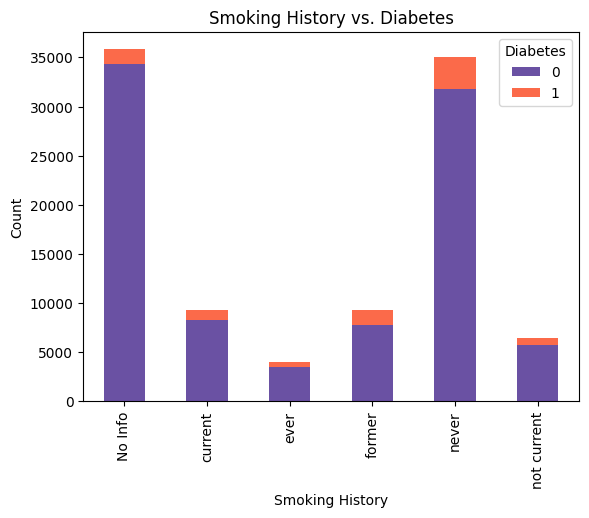

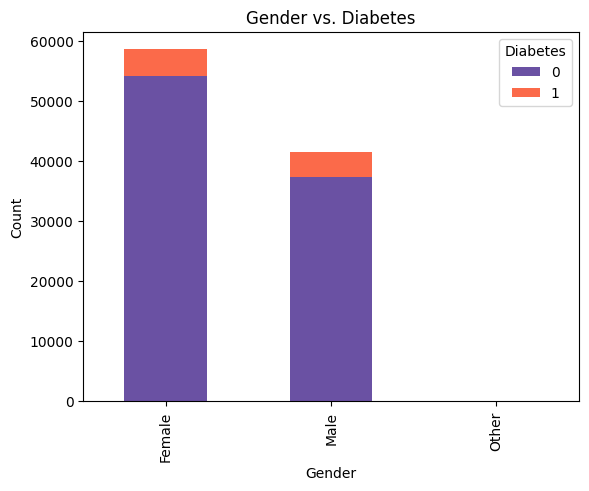

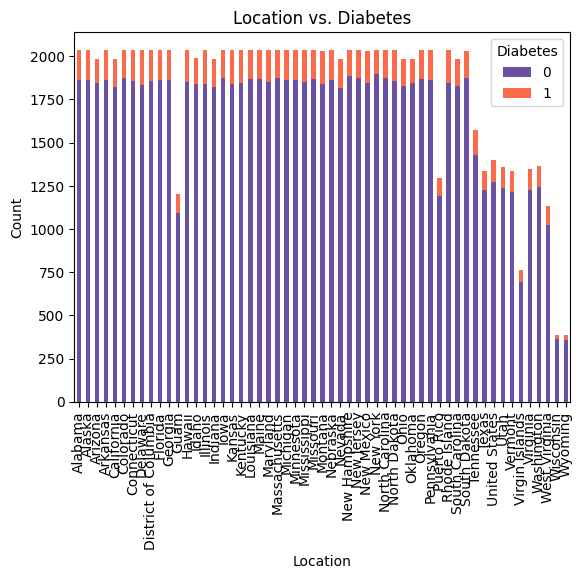

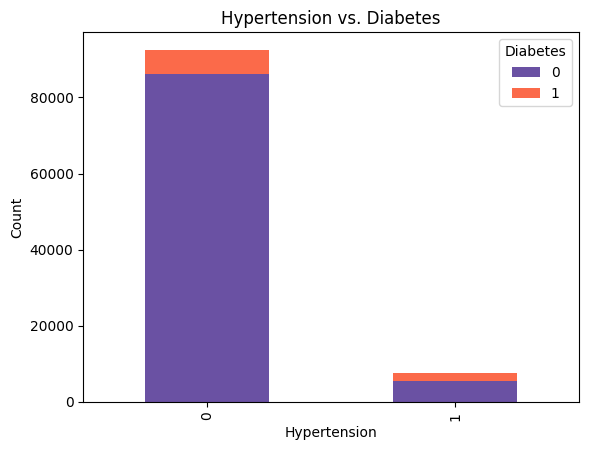

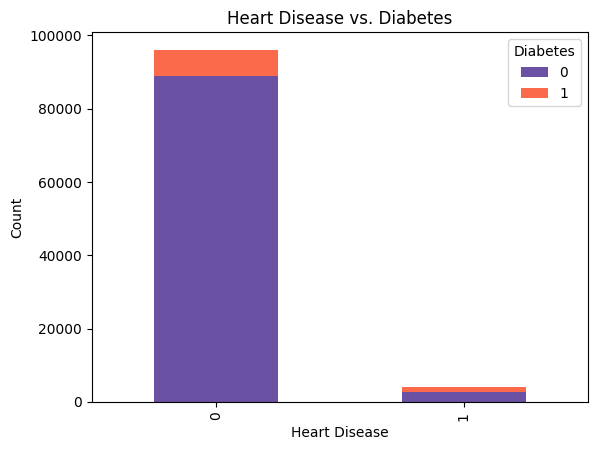

In [103]:
# Plotting different features
plot_crosstab(df, 'smoking_history', 'Smoking History vs. Diabetes', 'Smoking History')
plot_crosstab(df, 'gender', 'Gender vs. Diabetes', 'Gender')
plot_crosstab(df, 'location', 'Location vs. Diabetes', 'Location')
plot_crosstab(df, 'hypertension', 'Hypertension vs. Diabetes', 'Hypertension')
plot_crosstab(df, 'heart_disease', 'Heart Disease vs. Diabetes', 'Heart Disease')

In [104]:
############
# Creating figures for age,blood glucose level,HbA1c level and diabetes 

def plot_diabetes_distribution(df, feature, title, xlabel):
    df['diabetes'] = df['diabetes'].astype('category')
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y='diabetes', x=feature)
    plt.title(title)
    plt.ylabel('Diabetes')
    plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
    plt.xlabel(xlabel)
    plt.show()

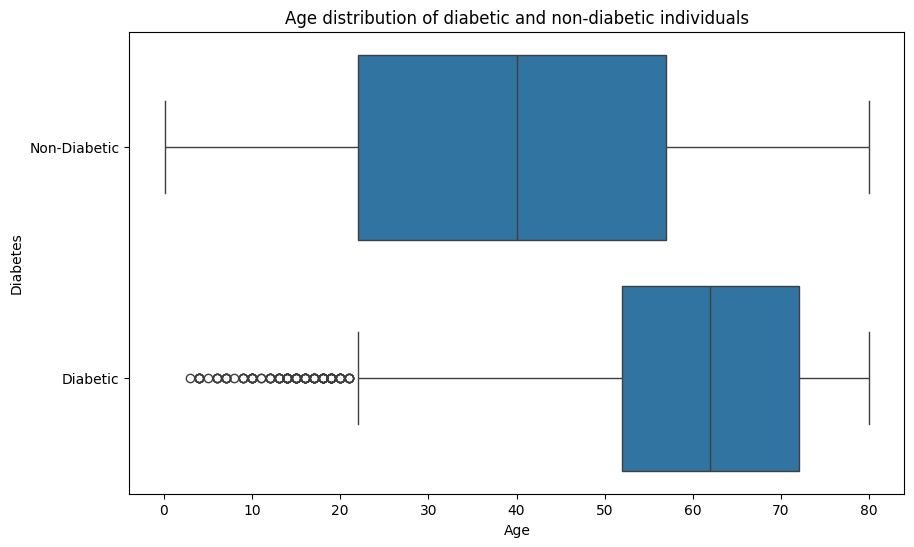

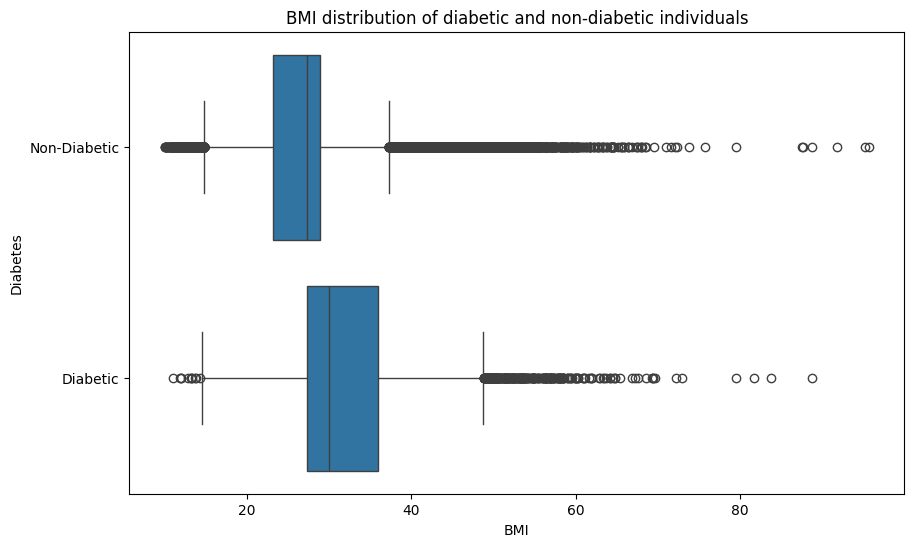

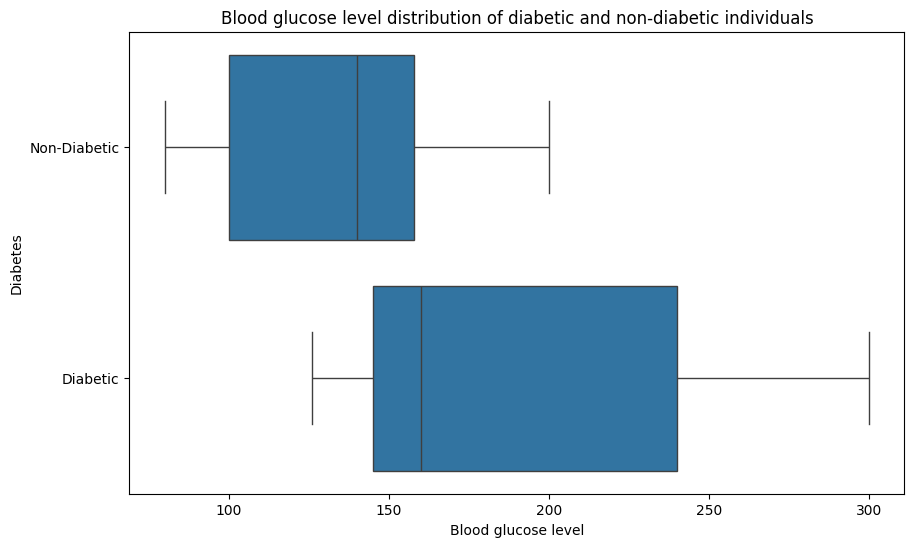

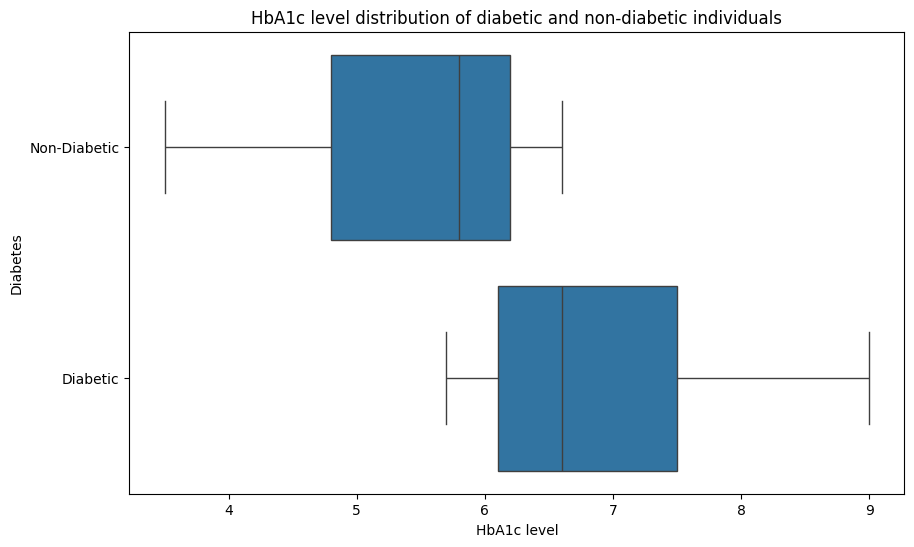

In [105]:
# Plotting different features
plot_diabetes_distribution(df, 'age', 'Age distribution of diabetic and non-diabetic individuals', 'Age')
plot_diabetes_distribution(df, 'bmi', 'BMI distribution of diabetic and non-diabetic individuals', 'BMI')
plot_diabetes_distribution(df, 'blood_glucose_level', 'Blood glucose level distribution of diabetic and non-diabetic individuals', 'Blood glucose level')
plot_diabetes_distribution(df, 'hbA1c_level', 'HbA1c level distribution of diabetic and non-diabetic individuals', 'HbA1c level')

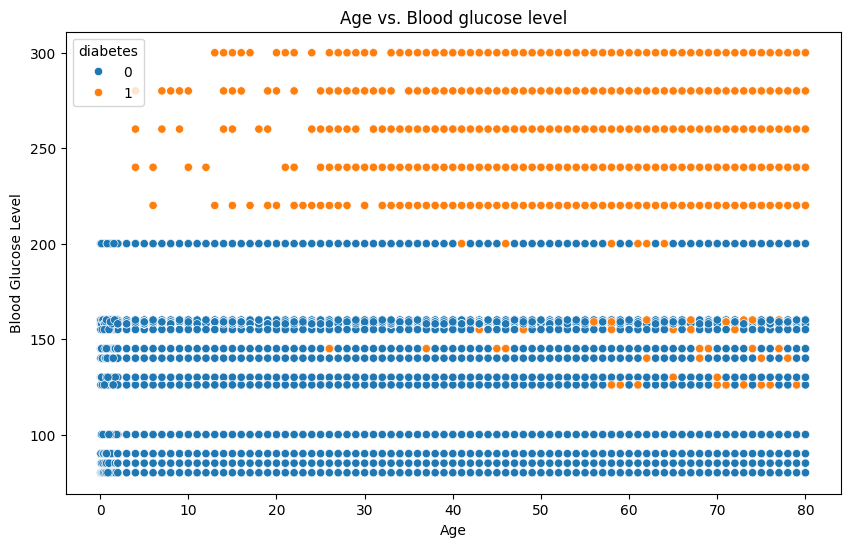

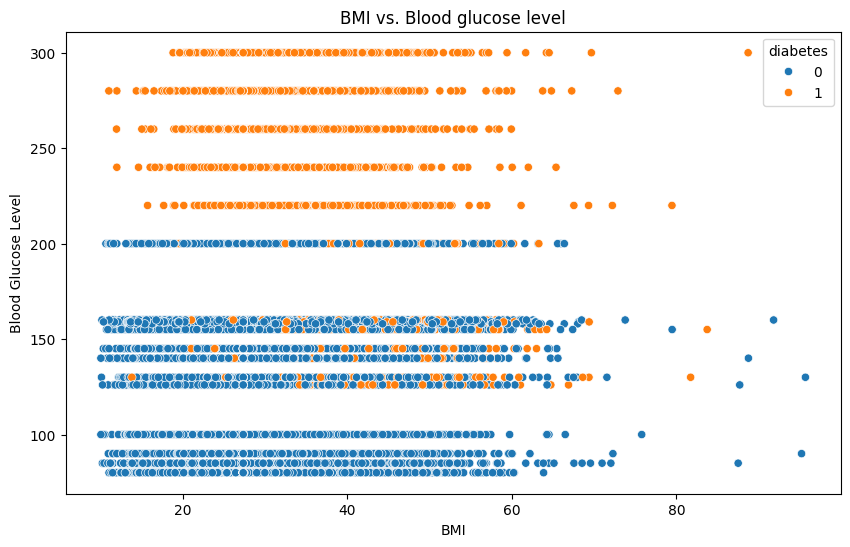

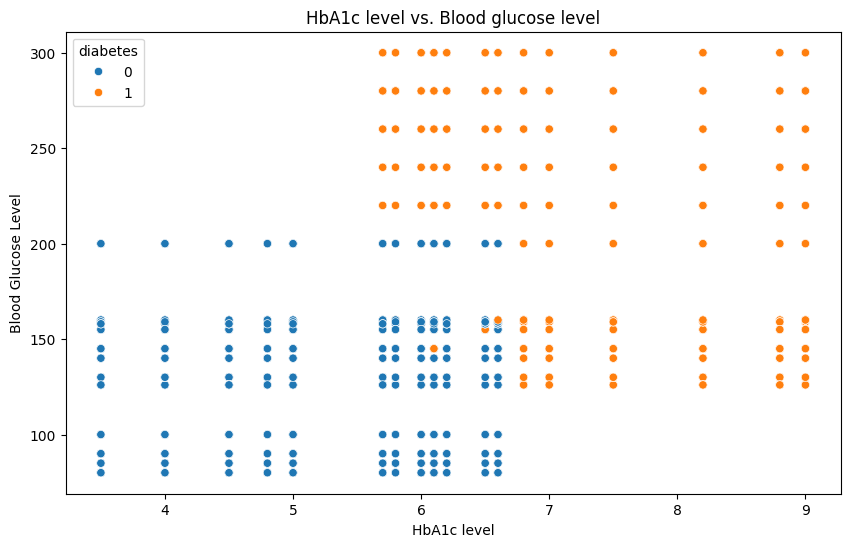

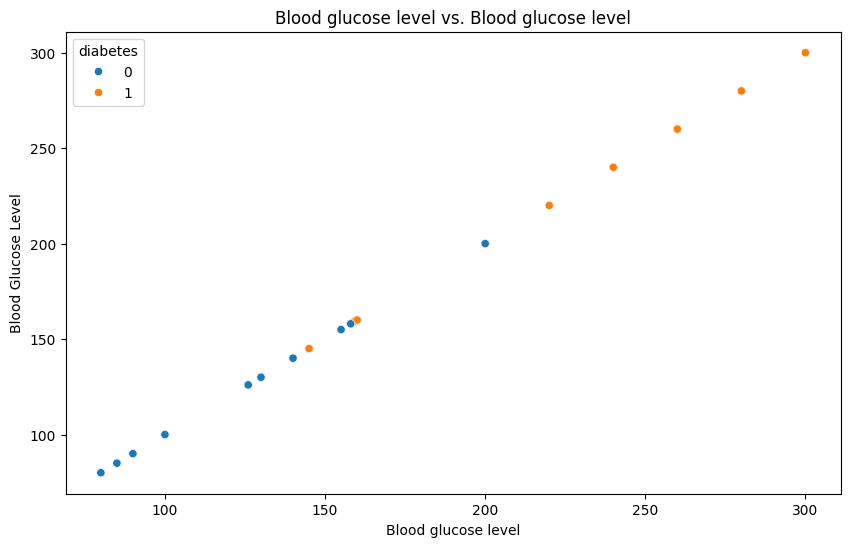

In [106]:
############
# Creating scatter plots for age,blood glucose level,HbA1c level and diabetes
def plot_scatter(df, feature, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='blood_glucose_level', hue='diabetes')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Blood Glucose Level')
    plt.show()

# Plotting different features
plot_scatter(df, 'age', 'Age vs. Blood glucose level', 'Age')
plot_scatter(df, 'bmi', 'BMI vs. Blood glucose level', 'BMI')
plot_scatter(df, 'hbA1c_level', 'HbA1c level vs. Blood glucose level', 'HbA1c level')
plot_scatter(df, 'blood_glucose_level', 'Blood glucose level vs. Blood glucose level', 'Blood glucose level')

In [107]:
summary = df.describe()
summary

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level
count,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000
mean,2018.360731,41.885930,0.202238,0.200098,0.198758,0.198898,0.200008,0.074860,0.039426,27.320767,5.527517,138.059518
std,1.345312,22.516409,0.401671,0.400075,0.399067,0.399173,0.400008,0.263167,0.194606,6.637248,1.070674,40.708667
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.580000,6.200000,159.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000


## Feature Selection/Extraction

In [108]:
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
cat_features = [c for c in df.columns if df[c].dtypes=='O']
print("Numerical: ",numerical_features)
print(" ")
print("Categorical: ",cat_features)

Numerical:  ['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
 
Categorical:  ['gender', 'location', 'smoking_history']


### Label Encoder

In [109]:
label=LabelEncoder()
df['gender']=label.fit_transform(df['gender'])
df['age']=label.fit_transform(df['age'])
df['location']=label.fit_transform(df['location'])
df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking_history')

In [110]:
# drop year column
df = df.drop('year', axis=1)

In [111]:
df.head()

,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,53,0,0,0,0,0,1,0,0,27.32,5.0,100,0,False,False,False,False,True,False
1,0,50,0,0,1,0,0,0,0,0,19.95,5.0,90,0,False,False,False,False,True,False
2,1,39,0,0,0,0,0,1,0,0,23.76,4.8,160,0,False,False,False,False,True,False
3,1,62,0,0,0,1,0,0,0,0,27.32,4.0,159,0,False,False,False,False,True,False
4,0,73,0,1,0,0,0,0,0,0,23.75,6.5,90,0,False,False,False,False,True,False


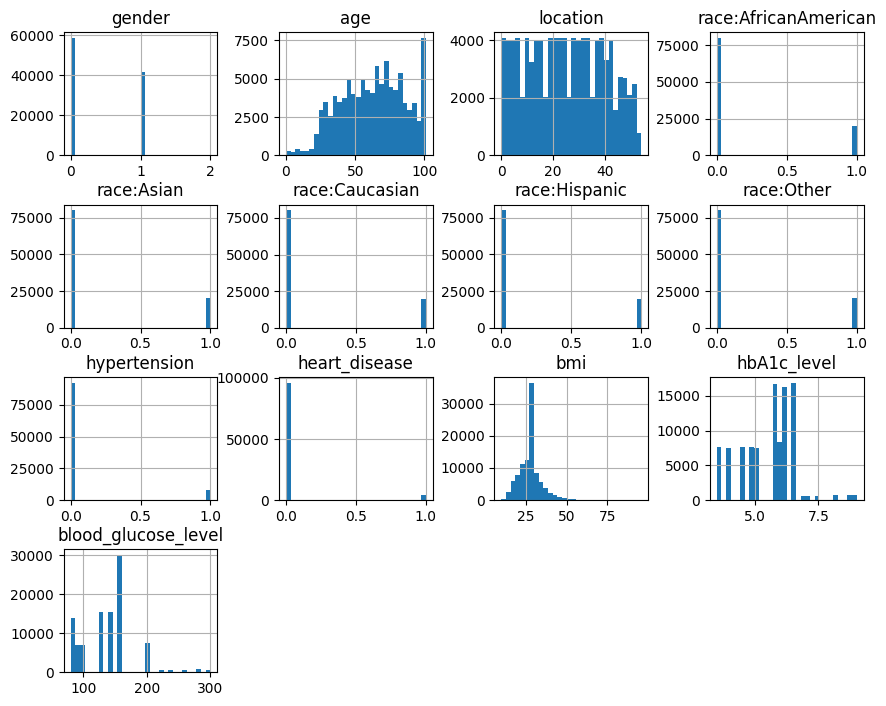

In [112]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
df.hist(bins=30, figsize=(10, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=.4, hspace=0.4)
plt.show()

### Correlation Analysis

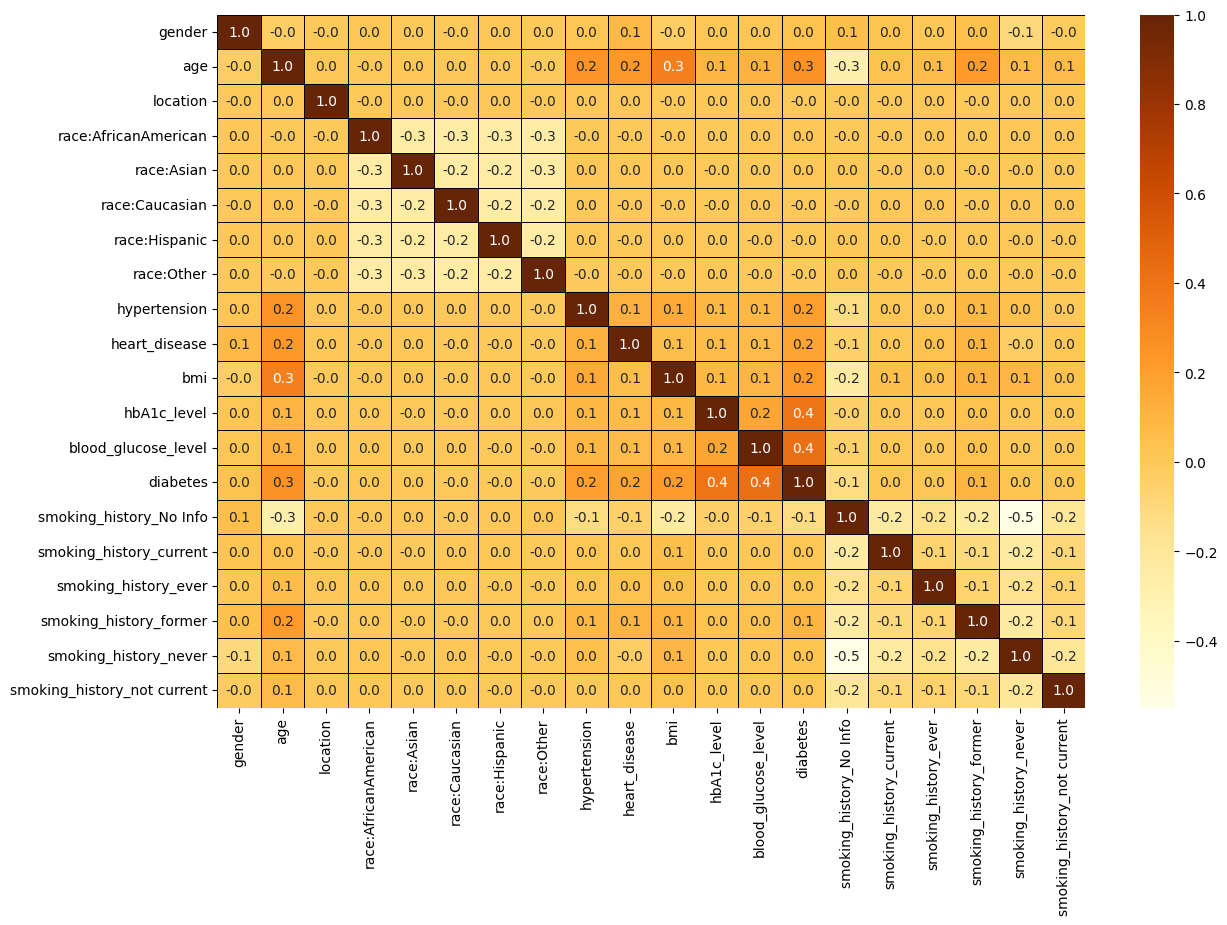

In [113]:
plt.figure(figsize=(14,9))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="YlOrBr",linewidths=0.6,fmt=".1f",linecolor="black")
plt.show()

In [114]:
corr_pairs=corr.unstack()
corr_pairs=corr_pairs[corr_pairs!=1].dropna()
corr_pairs=corr_pairs.sort_values(ascending=False)
top_correlated_pairs=corr_pairs.head(10)
low_correlated_pairs=corr_pairs.tail(10)
top_correlated_pairs

blood_glucose_level  diabetes               0.419574
diabetes             blood_glucose_level    0.419574
                     hbA1c_level            0.400688
hbA1c_level          diabetes               0.400688
age                  bmi                    0.344493
bmi                  age                    0.344493
diabetes             age                    0.255819
age                  diabetes               0.255819
                     hypertension           0.248926
hypertension         age                    0.248926
dtype: float64

In [115]:
low_correlated_pairs


race:Hispanic            race:AfricanAmerican      -0.250880
race:AfricanAmerican     race:Hispanic             -0.250880
race:Other               race:AfricanAmerican      -0.251754
race:AfricanAmerican     race:Other                -0.251754
                         race:Asian                -0.251825
race:Asian               race:AfricanAmerican      -0.251825
age                      smoking_history_No Info   -0.282861
smoking_history_No Info  age                       -0.282861
smoking_history_never    smoking_history_No Info   -0.549250
smoking_history_No Info  smoking_history_never     -0.549250
dtype: float64

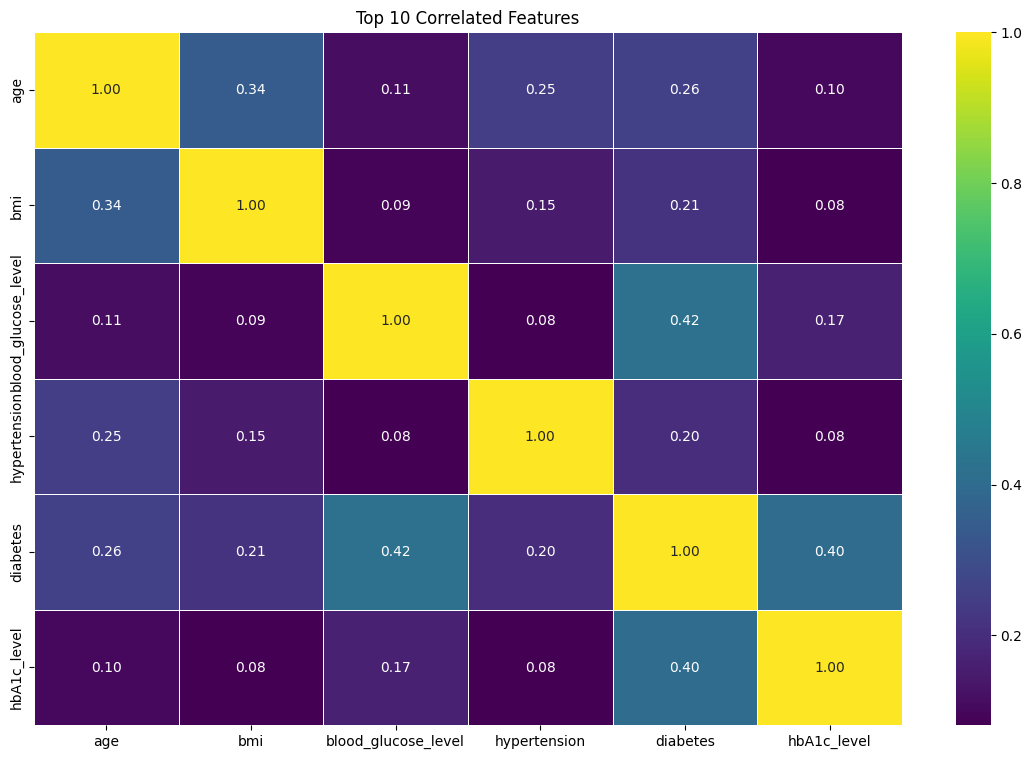

In [116]:
# Tampilkan korelasi tertinggi di heatmap
plt.figure(figsize=(14,9))
top_corr_columns = list(set([col for pair in top_correlated_pairs.index for col in pair]))
df_top_corr = df[top_corr_columns]
corr = df_top_corr.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Top 10 Correlated Features')
plt.show()


## Feature Selection

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [ ]:
#Chi-Square Feature Selection
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply SelectKBest with chi2
chi2_selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_kbest = chi2_selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[chi2_selector.get_support()]

In [ ]:
chi2_selected_features = pd.DataFrame(chi2_selector.scores_, columns=['chi2_score'])
chi2_selected_features['p_value'] = chi2_selector.pvalues_
chi2_selected_features['selected'] = chi2_selector.get_support() 
chi2_selected_features['feature'] = X.columns
chi2_selected_features = chi2_selected_features[chi2_selected_features['selected']]
chi2_selected_features.sort_values(by='chi2_score', ascending=False)
chi2_selected_features.drop('selected', axis=1, inplace=True)

In [137]:
# Result
print("Selected features using Chi-Square test:")
chi2_selected_features

Selected features using Chi-Square test:


,chi2_score,p_value,feature
0,82.110087,1.287141e-19,gender
1,55069.200618,0.000000e+00,age
8,3619.581384,0.000000e+00,hypertension
9,2832.116147,0.000000e+00,heart_disease
10,7407.994831,0.000000e+00,bmi
11,3329.130127,0.000000e+00,hbA1c_level
12,211280.193778,0.000000e+00,blood_glucose_level
13,907.629044,2.154597e-199,smoking_history_No Info
15,55.616546,8.807915e-14,smoking_history_ever
16,868.761127,6.066100e-191,smoking_history_former


In [129]:
# Standardize the data
scaler = StandardScaler()
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# ANOVA F-Test Feature Selection

selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_kbest = selector.fit_transform(X, y)

# Get selected feature names
selected_features = pd.DataFrame(X).columns[selector.get_support()]

In [138]:
anova_selected_features = pd.DataFrame(selector.scores_, columns=['f_score'])
anova_selected_features['p_value'] = selector.pvalues_
anova_selected_features['selected'] = selector.get_support()
anova_selected_features['feature'] = df.columns[:-1]
anova_selected_features = anova_selected_features[anova_selected_features['selected']]
anova_selected_features.sort_values(by='f_score', ascending=False)
anova_selected_features.drop('selected', axis=1, inplace=True)
anova_selected_features = anova_selected_features[anova_selected_features['feature'] != 'diabetes']


In [139]:
# Result
print("Selected features using ANOVA F-test:")
anova_selected_features

Selected features using ANOVA F-test:


,f_score,p_value,feature
0,140.258234,2.456915e-32,gender
1,7001.497895,0.000000e+00,age
8,4071.719722,0.000000e+00,hypertension
9,3037.877673,0.000000e+00,heart_disease
10,4815.505084,0.000000e+00,bmi
11,19122.639915,0.000000e+00,hbA1c_level
12,21362.005132,0.000000e+00,blood_glucose_level
16,967.659794,1.978620e-211,smoking_history_ever
17,74.370243,6.568343e-18,smoking_history_former


In [146]:
# Function to calculate sensitivity and specificity
def sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [141]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    # 'Support Vector Regression': SVR(),
}

## Repeated Holdout Method

In [147]:
results = [
    ('Model', 'Accuracy', 'Sensitivity', 'Specificity', 'ROC AUC', 'F1 Score', 'Precision', 'Recall')
]

In [159]:
# Repeated Holdout Validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Split the data into training and testing sets
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Evaluate models with repeated holdout validation

for model_name, model in models.items():
    print(f'==================== {model_name} ====================')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if model_name != 'Support Vector Regression':
        # For classification models
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        sensitivity, specificity = sensitivity_specificity(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
    else:
        # For regression models
        y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert continuous predictions to binary

        accuracy = accuracy_score(y_test, y_pred_binary)
        sensitivity, specificity = sensitivity_specificity(y_test, y_pred_binary)
        roc_auc = 'N/A'
        f1 = f1_score(y_test, y_pred_binary)
        precision = precision_score(y_test, y_pred_binary)
        recall = recall_score(y_test, y_pred_binary)

    # Append metrics for the current fold and k to results
    results.append((
                model_name, accuracy, sensitivity, specificity, roc_auc, f1, precision, recall
            ))

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'ROC AUC: {roc_auc}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print('')


==================== Logistic Regression ====================


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9557455745574558
Sensitivity: 0.599421965317919
Specificity: 0.9894898182614408
ROC AUC: 0.9575850756431854
F1 Score: 0.700912470429199
Precision: 0.8437754271765663
Recall: 0.599421965317919

==================== Decision Tree ====================
Accuracy: 0.953045304530453
Sensitivity: 0.7578034682080925
Specificity: 0.9715349244580688
ROC AUC: 0.8646691963330806
F1 Score: 0.7363100252737995
Precision: 0.71600218459858
Recall: 0.7578034682080925

==================== Random Forest ====================
Accuracy: 0.9731473147314732
Sensitivity: 0.6994219653179191
Specificity: 0.9990694109918984
ROC AUC: 0.9693320294750858
F1 Score: 0.8183970240108218
Precision: 0.9861450692746536
Recall: 0.6994219653179191

==================== K-Nearest Neighbors ====================
Accuracy: 0.9462946294629463
Sensitivity: 0.4554913294797688
Specificity: 0.9927742500547405
ROC AUC: 0.8568616304957277
F1 Score: 0.5947169811320755
Precision: 0.8565217391304348
Recall: 0.4554913294797688



In [160]:
# Create tanle of results
results_df = pd.DataFrame(results[1:], columns=results[0])
results_df


,Model,Accuracy,Sensitivity,Specificity,ROC AUC,F1 Score,Precision,Recall
0,Logistic Regression,0.955746,0.599422,0.989490,0.957585,0.700912,0.843775,0.599422
1,Decision Tree,0.953045,0.757803,0.971535,0.864669,0.736310,0.716002,0.757803
2,Random Forest,0.973147,0.699422,0.999069,0.969332,0.818397,0.986145,0.699422
3,K-Nearest Neighbors,0.946295,0.455491,0.992774,0.856862,0.594717,0.856522,0.455491
4,Support Vector Machine,0.945445,0.369364,1.000000,0.963840,0.539468,1.000000,0.369364


## K-Fold Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

# Evaluate models with K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

k_values = [5, 10]

# Initialize results table
results = [
    ('Model', 'K', 'Fold', 'Accuracy', 'Sensitivity', 'Specificity', 'ROC AUC', 'F1 Score', 'Precision', 'Recall')
]

for model_name, model in models.items():
    # Skip if results already calculated
    if any(result[0] == model_name for result in results[1:]):
        continue

    print(f'==================== {model_name} ====================')
    top_features = [index[0] for index in top_correlated_pairs.index if index[0] != 'diabetes']
    X = df[top_features]
    y = df['diabetes']

    for k in k_values:
        print(f'Using k = {k}')

        # Select top-k features
        top_k_features = top_features[:k]
        X_k = df[top_k_features]

        fold = 0
        for train_index, test_index in kf.split(X_k):
            fold += 1
            print(f'Fold {fold}, K-Fold Cross Validation = {kf.get_n_splits()}')
            X_train, X_test = X_k.iloc[train_index], X_k.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            if model_name != 'Support Vector Regression':
                # For classification models
                y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                sensitivity, specificity = sensitivity_specificity(y_test, y_pred)
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                f1 = f1_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
            else:
                # For regression models
                y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert continuous predictions to binary

                accuracy = accuracy_score(y_test, y_pred_binary)
                sensitivity, specificity = sensitivity_specificity(y_test, y_pred_binary)
                roc_auc = 'N/A'
                f1 = f1_score(y_test, y_pred_binary)
                precision = precision_score(y_test, y_pred_binary)
                recall = recall_score(y_test, y_pred_binary)

            # Append metrics for the current fold and k to results
            results.append((
                model_name, k, fold, accuracy, sensitivity, specificity, roc_auc, f1, precision, recall
            ))

            print(f'Accuracy: {accuracy}')
            print(f'Sensitivity: {sensitivity}')
            print(f'Specificity: {specificity}')
            print(f'ROC AUC: {roc_auc}')
            print(f'F1 Score: {f1}')
            print(f'Precision: {precision}')
            print(f'Recall: {recall}')
            print('')


==================== Logistic Regression ====================
Using k = 5
Fold 1, K-Fold Cross Validation = 5
Accuracy: 0.960996099609961
Sensitivity: 0.6283236994219653
Specificity: 0.9925005474052989
ROC AUC: 0.9605318406360787
F1 Score: 0.7359512525389302
Precision: 0.8880718954248366
Recall: 0.6283236994219653

Fold 2, K-Fold Cross Validation = 5
Accuracy: 0.960294044106616
Sensitivity: 0.6015578190533254
Specificity: 0.9929615888258403
ROC AUC: 0.9583660788470998
F1 Score: 0.7166309778729479
Precision: 0.8861429832303619
Recall: 0.6015578190533254

Fold 3, K-Fold Cross Validation = 5
Accuracy: 0.9593439015852377
Sensitivity: 0.6138211382113821
Specificity: 0.9919015047879617
ROC AUC: 0.9583664844270096
F1 Score: 0.7222412025965153
Precision: 0.8771784232365145
Recall: 0.6138211382113821

Fold 4, K-Fold Cross Validation = 5
Accuracy: 0.9582437365604841
Sensitivity: 0.592946802151823
Specificity: 0.9915957214581969
ROC AUC: 0.9545736678682565
F1 Score: 0.7037956722241929
Precision: 

In [162]:
# Create tanle of results
results_df = pd.DataFrame(results[1:], columns=results[0])
results_df


,Model,Accuracy,Sensitivity,Specificity,ROC AUC,F1 Score,Precision,Recall


In [61]:
# Group results by model and k
grouped_results = results_df.groupby(['Model', 'K']).mean().reset_index()
grouped_results 

,Model,K,Fold,Accuracy,Sensitivity,Specificity,ROC AUC,F1 Score,Precision,Recall
0,Decision Tree,5,3.0,0.953763,0.730126,0.974533,0.856286,0.728552,0.727067,0.730126
1,Decision Tree,10,3.0,0.954264,0.734840,0.974641,0.857602,0.731969,0.729291,0.734840
2,K-Nearest Neighbors,5,3.0,0.953634,0.539283,0.992120,0.884350,0.663974,0.863880,0.539283
3,K-Nearest Neighbors,10,3.0,0.953193,0.528982,0.992600,0.880799,0.657556,0.869060,0.528982
4,Logistic Regression,5,3.0,0.959894,0.613004,0.992108,0.958619,0.721972,0.878280,0.613004
5,Logistic Regression,10,3.0,0.960104,0.619871,0.991704,0.959984,0.725264,0.874024,0.619871
6,Random Forest,5,3.0,0.967095,0.692764,0.992567,0.953089,0.781478,0.896509,0.692764
7,Random Forest,10,3.0,0.967615,0.694899,0.992939,0.952627,0.784709,0.901453,0.694899
8,Support Vector Machine,5,3.0,0.949613,0.407433,0.999978,0.956411,0.578733,0.999407,0.407433
9,Support Vector Machine,10,3.0,0.948293,0.391770,0.999989,0.956149,0.562830,0.999689,0.391770


In [62]:
# Drop Fold 
grouped_results = grouped_results.drop('Fold', axis=1)
grouped_results

,Model,K,Accuracy,Sensitivity,Specificity,ROC AUC,F1 Score,Precision,Recall
0,Decision Tree,5,0.953763,0.730126,0.974533,0.856286,0.728552,0.727067,0.730126
1,Decision Tree,10,0.954264,0.734840,0.974641,0.857602,0.731969,0.729291,0.734840
2,K-Nearest Neighbors,5,0.953634,0.539283,0.992120,0.884350,0.663974,0.863880,0.539283
3,K-Nearest Neighbors,10,0.953193,0.528982,0.992600,0.880799,0.657556,0.869060,0.528982
4,Logistic Regression,5,0.959894,0.613004,0.992108,0.958619,0.721972,0.878280,0.613004
5,Logistic Regression,10,0.960104,0.619871,0.991704,0.959984,0.725264,0.874024,0.619871
6,Random Forest,5,0.967095,0.692764,0.992567,0.953089,0.781478,0.896509,0.692764
7,Random Forest,10,0.967615,0.694899,0.992939,0.952627,0.784709,0.901453,0.694899
8,Support Vector Machine,5,0.949613,0.407433,0.999978,0.956411,0.578733,0.999407,0.407433
9,Support Vector Machine,10,0.948293,0.391770,0.999989,0.956149,0.562830,0.999689,0.391770


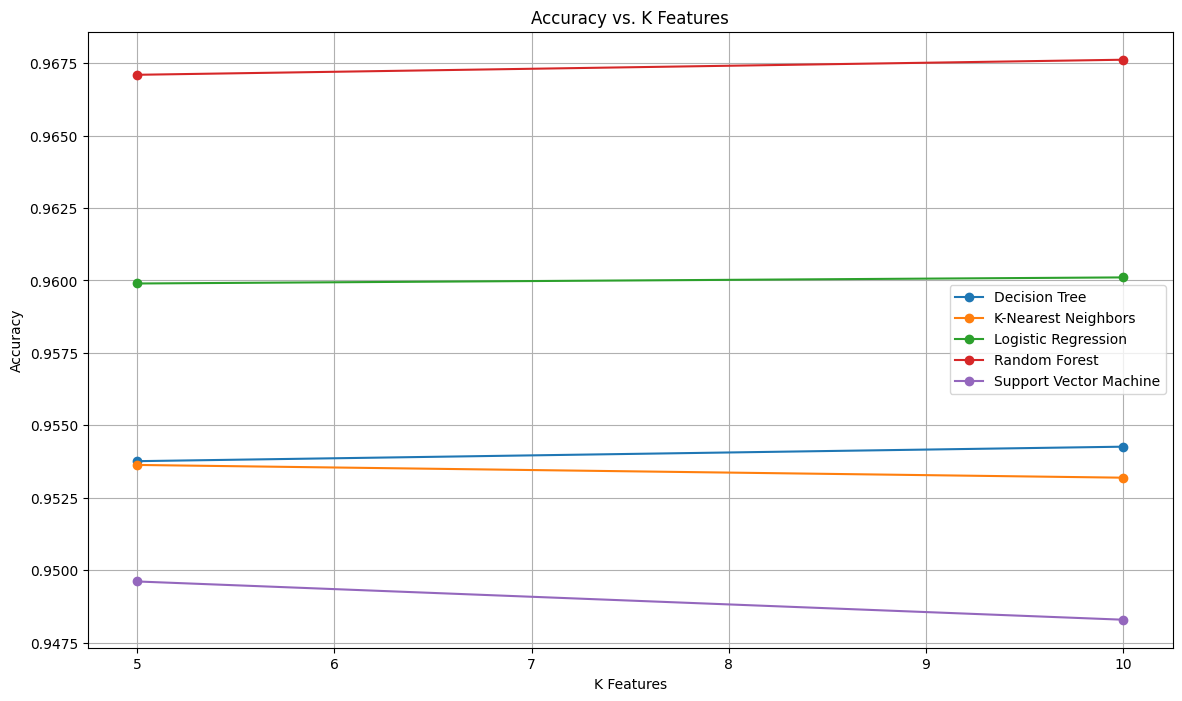

In [69]:
# Plot Line Chart
plt.figure(figsize=(14, 8))
for model_name in grouped_results['Model'].unique():
    model_results = grouped_results[grouped_results['Model'] == model_name]
    plt.plot(model_results['K'], model_results['Accuracy'], marker='o', label=model_name)
    
plt.title('Accuracy vs. K Features')
plt.xlabel('K Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()